# Datasets com Python e Scikit-learn

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [3]:
len(twenty_train.data)

2257

In [4]:
len(twenty_train.filenames)

2257

In [5]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [6]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [7]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [8]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [9]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [11]:
count_vector.vocabulary_.get(u'algorithm')

4690

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [13]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

## Uso do algoritimo Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

docs_new = ['God is love', 'OpenGL on the GPU is fast', 'the mesh is made up of cells']
X_new_counts = count_vector.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
'the mesh is made up of cells' => sci.med


# Pipeline Naive Bayes

In [15]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB())])
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [16]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predictedNB = text_clf.predict(docs_test)
np.mean(predictedNB == twenty_test.target)

0.8348868175765646

# Pipeline SVM

In [17]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None))
                    ])
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [18]:
predictedSVM = text_clf.predict(docs_test)
np.mean(predictedSVM == twenty_test.target)

0.9127829560585885

#### Metrica Naive Bayes

In [19]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predictedNB, target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

             micro avg       0.83      0.83      0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



In [20]:
print(metrics.confusion_matrix(twenty_test.target, predictedNB))

[[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


#### Metrica SVM

In [21]:
print(metrics.classification_report(twenty_test.target, predictedSVM, target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.81      0.87       319
         comp.graphics       0.88      0.97      0.92       389
               sci.med       0.94      0.90      0.92       396
soc.religion.christian       0.90      0.95      0.93       398

             micro avg       0.91      0.91      0.91      1502
             macro avg       0.92      0.91      0.91      1502
          weighted avg       0.92      0.91      0.91      1502



In [22]:
print(metrics.confusion_matrix(twenty_test.target, predictedSVM))

[[258  11  15  35]
 [  4 379   3   3]
 [  5  33 355   3]
 [  5  10   4 379]]


#### Ajuste de parametros

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range':[(1,1),(1,2)],
             'tfidf__use_idf':(True, False),
             'clf__alpha': (1e-2, 1e-3)}

gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=1)
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'





## Comparação gráfica de precisão por categoria entre os algoritimos Naive Bayes e SVM.

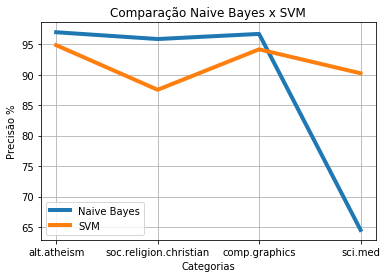

0.8851369174049685

In [38]:
from sklearn.metrics import precision_score

#Precisão de cada algoritimo por categoria.
pSVM = precision_score(twenty_test.target, predictedSVM, average=None)
pNB = precision_score(twenty_test.target, predictedNB, average=None)
pAvgSVM = precision_score(twenty_test.target, predictedNB, average='macro')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = categories
fig, ax = plt.subplots()
lines = ax.plot(t, pNB * 100,t,pSVM * 100)

plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=4)


ax.set(xlabel='Categorias', ylabel='Precisão %', title='Comparação Naive Bayes x SVM')
ax.legend(('Naive Bayes', 'SVM'), loc='lower left')
ax.grid()
fig.savefig("test.png")
plt.show()
pAvgSVM